In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

In [2]:
raw = pd.read_csv('blcakFriday_vector.csv')
df = raw.copy(deep=True).drop('Unnamed: 0', axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,-1.233261,1.751138,-1.844439,0.293877,-1.369841,0.108962,-0.831545,-0.612032,-1.092294,4
1,-1.231914,1.751138,-1.844439,0.293877,-1.369841,0.108962,-0.831545,-1.145266,-0.126361,7
2,-1.230566,1.751138,-1.844439,0.293877,-1.369841,0.108962,-0.831545,1.787522,-1.092294,1
3,-1.229219,1.751138,-1.844439,0.293877,-1.369841,0.108962,-0.831545,1.787522,1.161549,1
4,-1.227872,-0.571057,2.591521,1.213543,1.263032,1.659557,-0.831545,0.721053,-1.092294,4


In [3]:
feat = list(df.columns)
feat.remove('Purchase')
feat

['Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2']

In [4]:
features = df[feat]
label = df['Purchase']

smt = SMOTE(random_state=20)
    
X_train_old, X_test, Y_train_old, Y_test = train_test_split(features, label, 
                                                            test_size=0.20, 
                                                            random_state=0)
X_train, Y_train = smt.fit_sample(X_train_old, Y_train_old)
# raise XGBoost ValueError: feature_names mismatch
X_train = pd.DataFrame(X_train, columns=list(X_train_old.columns))
print('train/test set:', len(X_train), len(X_test))

train/test set: 1039450 107516


In [5]:
# Random Forest
forest = RandomForestClassifier(n_estimators=100, 
                                max_depth=30,
                                criterion='entropy')
# print('CVS:', np.mean(cross_val_score(forest, X_train, Y_train, cv=10)))
forest.fit(X_train, Y_train)
Y_test_predict = forest.predict(X_test)

ACC: 0.4115201458387589
Confusion Matrix:
 [[ 3270  1251  1367   414   134     0     0     0     0     0]
 [ 1115  3416  3367  1441   944   273   554    91   167     4]
 [  936  2475 16051  4845  1484   312    54     6     0     2]
 [  347  1378  6315  6335  3991   714  1277   222   415     8]
 [   97   659  1015  3470  5211  1036  2890   463   846    11]
 [    0   141   148   379   875  1854   982   197   456    55]
 [    1   273    35   679  2160  1086  5337   912  2243    32]
 [    0    53     2    95   309   167   887   431   601   185]
 [    1    80     0   188   593   353  1998   540  2000    29]
 [    0     0     0     2     2    28     6   104     4   340]]
Overall Report:
               precision    recall  f1-score   support

           1       0.57      0.51      0.54      6436
           2       0.35      0.30      0.32     11372
           3       0.57      0.61      0.59     26165
           4       0.35      0.30      0.33     21002
           5       0.33      0.33     

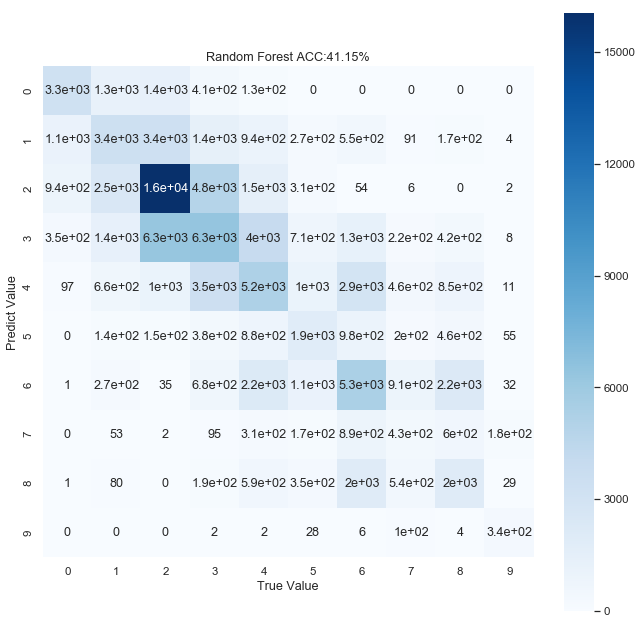

In [14]:
acc = accuracy_score(Y_test, Y_test_predict)
print('ACC:', acc)
mat = confusion_matrix(Y_test, Y_test_predict)
print('Confusion Matrix:\n', mat)

plt.figure(figsize=(11, 11))
sns.set(font_scale=1.05)
sns.heatmap(mat, square=True, annot=True, cmap='Blues')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.title('Random Forest ACC:{0:.2f}%'.format(acc * 100))
plt.savefig('randomForest.png')
print('Overall Report:\n', classification_report(Y_test, Y_test_predict))